In [9]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine, euclidean

In [2]:
model = SentenceTransformer('sentence-transformers/LaBSE')
data = pd.read_csv('../train.csv', index_col='pair_id')

In [3]:
embeddings_name1 = model.encode(data['name_1'].tolist(), device='cuda')

name1_list = []
for row in embeddings_name1:
    name1_list.append([row])

In [4]:
embeddings_name2 = model.encode(data['name_2'].tolist(), device='cuda')

name2_list = []
for row in embeddings_name2:
    name2_list.append([row])

In [5]:
data['name_1_labse'] = name1_list
data['name_2_labse'] = name2_list

In [6]:
data

,name_1,name_2,is_duplicate,name_1_labse,name_2_labse
pair_id,,,,,
1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0,"[[0.010861836, -0.08222399, -0.041933857, -0.0...","[[0.022001328, -0.02445636, -0.0066282894, 0.0..."
2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0,"[[-0.016540471, -0.07479911, -0.00073565415, 0...","[[0.025532471, -0.07653274, 0.0019659796, -0.0..."
3,"Rishichem Distributors Pvt., Ltd.",Dsa,0,"[[-0.018357374, -0.0012913939, -0.037772927, 0...","[[-0.0043047145, -0.0067142365, -0.023502031, ..."
4,Powermax Rubber Factory,Co. One,0,"[[-0.03751746, -0.0052636373, 0.026744232, 0.0...","[[-0.021223964, -0.037608422, -0.06639316, -0...."
5,Tress A/S,Longyou Industries Park Zhejiang,0,"[[0.0038034725, -0.062630594, -0.02018179, -0....","[[0.019764744, -0.04415891, 0.06637642, 0.0051..."
...,...,...,...,...,...
497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,0,"[[-0.023708265, -0.052481983, 0.022383098, 0.0...","[[-0.031874657, -0.06620433, 0.020537687, 0.00..."
497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0,"[[-0.03783887, -0.019608006, -0.015716784, 0.0...","[[-0.012938609, -0.052719004, -0.027224453, -0..."
497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0,"[[0.03949221, -0.076782376, 0.014149324, -0.01...","[[-0.0019853532, -0.05424527, 0.012387251, -0...."


In [16]:
from tqdm import tqdm

cosine_name1 = []
euclidean_name1 = []
for item in tqdm(zip(data['name_1_labse'], data['name_2_labse'])):
    cosine_name1.append(cosine(item[0], item[1]))
    euclidean_name1.append(euclidean(item[0], item[1]))

497819it [00:34, 14370.04it/s]


In [17]:
data['cosine'] = cosine_name1
data['euclidean'] = euclidean_name1

In [18]:
data

,name_1,name_2,is_duplicate,name_1_labse,name_2_labse,cosine,euclidean
pair_id,,,,,,,
1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0,"[[0.010861836, -0.08222399, -0.041933857, -0.0...","[[0.022001328, -0.02445636, -0.0066282894, 0.0...",0.393024,0.886593
2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0,"[[-0.016540471, -0.07479911, -0.00073565415, 0...","[[0.025532471, -0.07653274, 0.0019659796, -0.0...",0.363251,0.852351
3,"Rishichem Distributors Pvt., Ltd.",Dsa,0,"[[-0.018357374, -0.0012913939, -0.037772927, 0...","[[-0.0043047145, -0.0067142365, -0.023502031, ...",0.875808,1.323486
4,Powermax Rubber Factory,Co. One,0,"[[-0.03751746, -0.0052636373, 0.026744232, 0.0...","[[-0.021223964, -0.037608422, -0.06639316, -0....",0.801411,1.266026
5,Tress A/S,Longyou Industries Park Zhejiang,0,"[[0.0038034725, -0.062630594, -0.02018179, -0....","[[0.019764744, -0.04415891, 0.06637642, 0.0051...",1.022021,1.429700
...,...,...,...,...,...,...,...
497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,0,"[[-0.023708265, -0.052481983, 0.022383098, 0.0...","[[-0.031874657, -0.06620433, 0.020537687, 0.00...",0.863760,1.314351
497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0,"[[-0.03783887, -0.019608006, -0.015716784, 0.0...","[[-0.012938609, -0.052719004, -0.027224453, -0...",0.560358,1.058639
497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0,"[[0.03949221, -0.076782376, 0.014149324, -0.01...","[[-0.0019853532, -0.05424527, 0.012387251, -0....",0.242211,0.696005


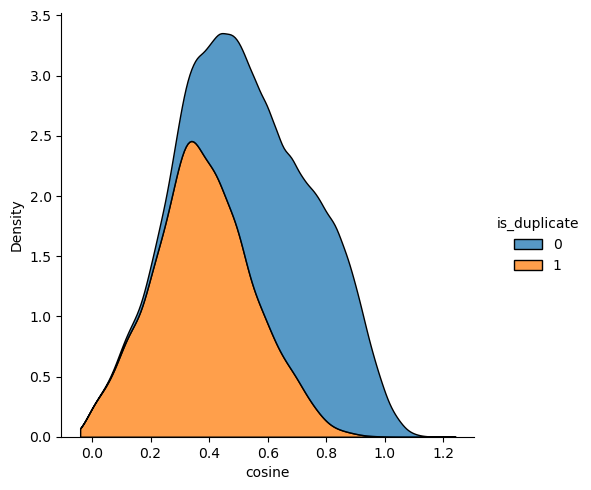

In [33]:
import seaborn as sns

sns.displot(data, x="cosine", hue="is_duplicate", multiple="stack", common_norm=False, kind="kde")

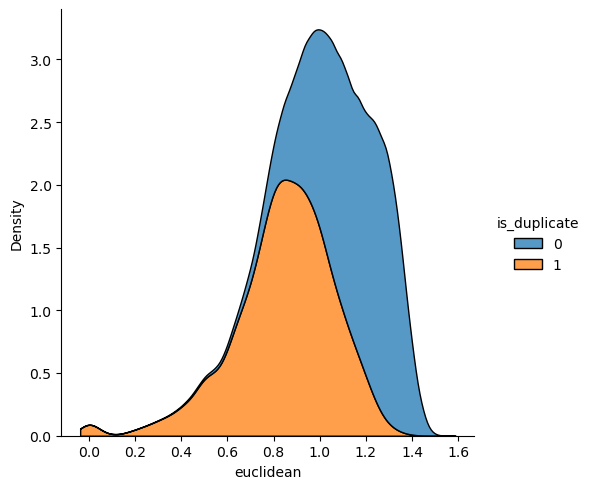

In [30]:
sns.displot(data, x="euclidean", hue="is_duplicate", multiple="stack", common_norm=False, kind="kde")

<h1>COSINE DISTANCE</h1>

In [59]:
from sklearn.model_selection import train_test_split

X = data['cosine']
y = data['is_duplicate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier()
clf = clf.fit(X_train.to_numpy().reshape(-1, 1), y_train.to_numpy().reshape(-1, 1))

y_pred = clf.predict(X_test.to_numpy().reshape(-1, 1))

result1 = classification_report(y_test.to_numpy().reshape(-1, 1), y_pred)
print("Полученные результаты классификации:",)
print (result1)

C:\Users\konon\AppData\Local\Temp\ipykernel_2768\2366894489.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train.to_numpy().reshape(-1, 1), y_train.to_numpy().reshape(-1, 1))


Полученные результаты классификации:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     98835
           1       0.22      0.23      0.22       729

    accuracy                           0.99     99564
   macro avg       0.61      0.61      0.61     99564
weighted avg       0.99      0.99      0.99     99564



Logistic regression

In [61]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf = clf.fit(X_train.to_numpy().reshape(-1, 1), y_train.to_numpy().reshape(-1, 1))

y_pred = clf.predict(X_test.to_numpy().reshape(-1, 1))

result1 = classification_report(y_test.to_numpy().reshape(-1, 1), y_pred)
print("Полученные результаты классификации:",)
print (result1)

C:\Users\konon\anaconda3\envs\GPEN_m\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Полученные результаты классификации:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     98835
           1       0.00      0.00      0.00       729

    accuracy                           0.99     99564
   macro avg       0.50      0.50      0.50     99564
weighted avg       0.99      0.99      0.99     99564



C:\Users\konon\anaconda3\envs\GPEN_m\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\konon\anaconda3\envs\GPEN_m\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\konon\anaconda3\envs\GPEN_m\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# HYPERPARAMETERS TUNING

In [46]:
from ray.tune.sklearn import TuneSearchCV
from ray import tune

param_dists = {
    'criterion': tune.choice(['gini', 'entropy']),
    'max_depth': tune.choice([i for i in range(2, 17)]),
    'max_features': tune.choice(['log2', 'sqrt']),
    'min_samples_leaf': tune.choice([i for i in range(2, 33)]),
    'min_samples_split': tune.choice([i for i in range(2, 17)]),
    'random_state': tune.choice([23])
}

hyperopt_tune_search = TuneSearchCV(RandomForestClassifier(),
    param_distributions=param_dists,
    n_trials=2,
    early_stopping=True,
    max_iters=10,
    search_optimization="hyperopt"
)

hts = hyperopt_tune_search.fit(X_train.to_numpy().reshape(-1, 1), y_train.to_numpy().reshape(-1, 1))

y_pred = hts.predict(X_test.to_numpy().reshape(-1, 1))

result1 = classification_report(y_test.to_numpy().reshape(-1, 1), y_pred)
print("Полученные результаты классификации:",)
print (result1)

(_Trainable pid=10268) C:\Users\konon\anaconda3\envs\GPEN_m\lib\site-packages\tune_sklearn\_trainable.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(_Trainable pid=10268)   estimator.fit(X_train, y_train)
(_Trainable pid=24300) C:\Users\konon\anaconda3\envs\GPEN_m\lib\site-packages\tune_sklearn\_trainable.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(_Trainable pid=24300)   estimator.fit(X_train, y_train)
(_Trainable pid=24300) C:\Users\konon\anaconda3\envs\GPEN_m\lib\site-packages\tune_sklearn\_trainable.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(_Trainable pid=24300)   estimator.fit(X_train, y_train)
(_Trainable pid=10268) C:\Users\ko

Полученные результаты классификации:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     98840
           1       0.90      0.01      0.02       724

    accuracy                           0.99     99564
   macro avg       0.95      0.51      0.51     99564
weighted avg       0.99      0.99      0.99     99564



In [47]:
hts.best_params

{'criterion': 'entropy',
 'max_depth': 13,
 'max_features': 'log2',
 'min_samples_leaf': 25,
 'min_samples_split': 3,
 'random_state': 23,
 'n_estimators': 10}

In [48]:
us_data = pd.DataFrame()
us_data['cosine'] = X_train
us_data['is_duplicate'] = y_train

In [53]:
us_data['is_duplicate'].value_counts()

0    395321
1      2934
Name: is_duplicate, dtype: int64

In [49]:
rat = len(us_data.loc[us_data['is_duplicate']==0])//len(us_data.loc[us_data['is_duplicate']==1])

In [51]:
df_1 = us_data.loc[us_data['is_duplicate']==1]
df_1 = df_1.loc[df_1.index.repeat(rat)]
train_n = pd.concat([us_data.loc[us_data['is_duplicate']==0], df_1]).sample(frac=1)

In [52]:
train_n['is_duplicate'].value_counts()

0    395321
1    393156
Name: is_duplicate, dtype: int64

In [54]:
X_train_us = train_n['cosine']
y_train_us = train_n['is_duplicate']

Random forest

In [55]:
clf_us = RandomForestClassifier()
clf_us = clf_us.fit(X_train_us.to_numpy().reshape(-1, 1), y_train_us.to_numpy())

y_pred = clf_us.predict(X_test.to_numpy().reshape(-1, 1))

result1 = classification_report(y_test.to_numpy(), y_pred)
print("Полученные результаты классификации:",)
print (result1)

C:\Users\konon\AppData\Local\Temp\ipykernel_2768\1054344919.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_us = clf_us.fit(X_train_us.to_numpy().reshape(-1, 1), y_train_us.to_numpy().reshape(-1, 1))


Полученные результаты классификации:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     98840
           1       0.21      0.22      0.21       724

    accuracy                           0.99     99564
   macro avg       0.60      0.61      0.60     99564
weighted avg       0.99      0.99      0.99     99564



Logistic regression

In [57]:
clf_us = LogisticRegression()
clf_us = clf_us.fit(X_train_us.to_numpy().reshape(-1, 1), y_train_us.to_numpy())

y_pred = clf_us.predict(X_test.to_numpy().reshape(-1, 1))

result1 = classification_report(y_test.to_numpy(), y_pred)
print("Полученные результаты классификации:",)
print (result1)

Полученные результаты классификации:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86     98840
           1       0.02      0.76      0.04       724

    accuracy                           0.76     99564
   macro avg       0.51      0.76      0.45     99564
weighted avg       0.99      0.76      0.86     99564



Random forest with hyperparameter tuning

In [62]:
hts = hyperopt_tune_search.fit(X_train_us.to_numpy().reshape(-1, 1), y_train_us.to_numpy().reshape(-1, 1))

y_pred = hts.predict(X_test.to_numpy().reshape(-1, 1))

result1 = classification_report(y_test.to_numpy().reshape(-1, 1), y_pred)
print("Полученные результаты классификации:",)
print (result1)

(_Trainable pid=572) C:\Users\konon\anaconda3\envs\GPEN_m\lib\site-packages\tune_sklearn\_trainable.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(_Trainable pid=572)   estimator.fit(X_train, y_train)
(_Trainable pid=11612) C:\Users\konon\anaconda3\envs\GPEN_m\lib\site-packages\tune_sklearn\_trainable.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(_Trainable pid=11612)   estimator.fit(X_train, y_train)
(_Trainable pid=572) C:\Users\konon\anaconda3\envs\GPEN_m\lib\site-packages\tune_sklearn\_trainable.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(_Trainable pid=572)   estimator.fit(X_train, y_train)
(_Trainable pid=11612) C:\Users\konon\anac

Полученные результаты классификации:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86     98835
           1       0.02      0.81      0.05       729

    accuracy                           0.76     99564
   macro avg       0.51      0.78      0.45     99564
weighted avg       0.99      0.76      0.86     99564



In [63]:
hts.best_params

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 14,
 'random_state': 23,
 'n_estimators': 10}

# EUCLIDIAN

In [69]:
X = data['euclidean']
y = data['is_duplicate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf = clf.fit(X_train.to_numpy().reshape(-1, 1), y_train.to_numpy().reshape(-1, 1))

y_pred = clf.predict(X_test.to_numpy().reshape(-1, 1))

result1 = classification_report(y_test.to_numpy().reshape(-1, 1), y_pred)
print("Полученные результаты классификации:", )
print(result1)

C:\Users\konon\AppData\Local\Temp\ipykernel_2768\1734428828.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train.to_numpy().reshape(-1, 1), y_train.to_numpy().reshape(-1, 1))


Полученные результаты классификации:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     98839
           1       0.23      0.23      0.23       725

    accuracy                           0.99     99564
   macro avg       0.61      0.61      0.61     99564
weighted avg       0.99      0.99      0.99     99564



In [70]:
clf = LogisticRegression()
clf = clf.fit(X_train.to_numpy().reshape(-1, 1), y_train.to_numpy().reshape(-1, 1))

y_pred = clf.predict(X_test.to_numpy().reshape(-1, 1))

result1 = classification_report(y_test.to_numpy().reshape(-1, 1), y_pred)
print("Полученные результаты классификации:", )
print(result1)

C:\Users\konon\anaconda3\envs\GPEN_m\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Полученные результаты классификации:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     98839
           1       0.31      0.01      0.02       725

    accuracy                           0.99     99564
   macro avg       0.65      0.51      0.51     99564
weighted avg       0.99      0.99      0.99     99564



# HYPERPARAMETER TUNING

In [71]:
from ray.tune.sklearn import TuneSearchCV
from ray import tune

param_dists = {
    'criterion': tune.choice(['gini', 'entropy']),
    'max_depth': tune.choice([i for i in range(2, 17)]),
    'max_features': tune.choice(['log2', 'sqrt']),
    'min_samples_leaf': tune.choice([i for i in range(2, 33)]),
    'min_samples_split': tune.choice([i for i in range(2, 17)]),
    'random_state': tune.choice([23])
}

hyperopt_tune_search = TuneSearchCV(RandomForestClassifier(),
                                    param_distributions=param_dists,
                                    n_trials=2,
                                    early_stopping=True,
                                    max_iters=10,
                                    search_optimization="hyperopt"
                                    )

hts = hyperopt_tune_search.fit(X_train.to_numpy().reshape(-1, 1), y_train.to_numpy().reshape(-1, 1))

y_pred = hts.predict(X_test.to_numpy().reshape(-1, 1))

result1 = classification_report(y_test.to_numpy().reshape(-1, 1), y_pred)
print("Полученные результаты классификации:", )
print(result1)

(_Trainable pid=5928) C:\Users\konon\anaconda3\envs\GPEN_m\lib\site-packages\tune_sklearn\_trainable.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(_Trainable pid=5928)   estimator.fit(X_train, y_train)
(_Trainable pid=5252) C:\Users\konon\anaconda3\envs\GPEN_m\lib\site-packages\tune_sklearn\_trainable.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(_Trainable pid=5252)   estimator.fit(X_train, y_train)
(_Trainable pid=5928) C:\Users\konon\anaconda3\envs\GPEN_m\lib\site-packages\tune_sklearn\_trainable.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(_Trainable pid=5928)   estimator.fit(X_train, y_train)
(_Trainable pid=5252) C:\Users\konon\ana

Полученные результаты классификации:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     98839
           1       0.43      0.01      0.02       725

    accuracy                           0.99     99564
   macro avg       0.71      0.50      0.51     99564
weighted avg       0.99      0.99      0.99     99564



In [73]:
hts.best_params

{'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'sqrt',
 'min_samples_leaf': 29,
 'min_samples_split': 11,
 'random_state': 23,
 'n_estimators': 10}